In [1]:
import pandas as pd
import numpy as np

In [2]:
movies_df =pd.read_csv('movies.csv')
ratings_df=pd.read_csv('ratings.csv')
links_df=pd.read_csv('links.csv')
tags_df=pd.read_csv('tags.csv')

**What is the shape of "movies.csv"?**

In [3]:
movies_df.shape

(9742, 3)

**What is the shape of "ratings.csv"?**


In [4]:
ratings_df.shape

(100836, 4)

**How many unique "userId" are available in "ratings.csv"?**


In [5]:
unique_user_ids =ratings_df['userId'].nunique()
print("Number of unique userId values in ratings.csv:", unique_user_ids)

Number of unique userId values in ratings.csv: 610


**Which movie has recieved maximum number of user ratings?**

In [6]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

# Find the movie with the maximum number of ratings
max_rated_movie = merged_df['title'].value_counts().idxmax()

# Display the result
print("Movie with the maximum number of user ratings-")
print("Movie Title:", max_rated_movie)

Movie with the maximum number of user ratings-
Movie Title: Forrest Gump (1994)


**Select all the correct tags submitted by users to "Matrix, The (1999)" movie?**

In [9]:
matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]
print(matrix_movie_id)

2571


In [10]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [11]:
#tags for "Matrix, The (1999)"
matrix_tags = tags_df[tags_df['movieId'].eq(movies_df[movies_df['title'].eq('Matrix, The (1999)')]['movieId'].iloc[0])]['tag']


print("Tags submitted by users for 'Matrix, The (1999)':")
print(matrix_tags)

Tags submitted by users for 'Matrix, The (1999)':
815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


**What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?**

In [12]:
#the movieId for "Terminator 2: Judgment Day (1991)"
#Locating rows where the title column is exactly equal to 'Terminator 2: Judgment Day (1991)'.
#Specifying that only the movieId column should be returned.
terminator_movie_id = movies_df.loc[movies_df['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].iloc[0]

# the average user rating for "Terminator 2: Judgment Day (1991)"
average_rating = ratings_df.loc[ratings_df['movieId'] == terminator_movie_id, 'rating'].mean()

average_rating_ans = format(average_rating, ".4f")
print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating_ans)


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.9710


**How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?**

In [13]:
import matplotlib.pyplot as plt

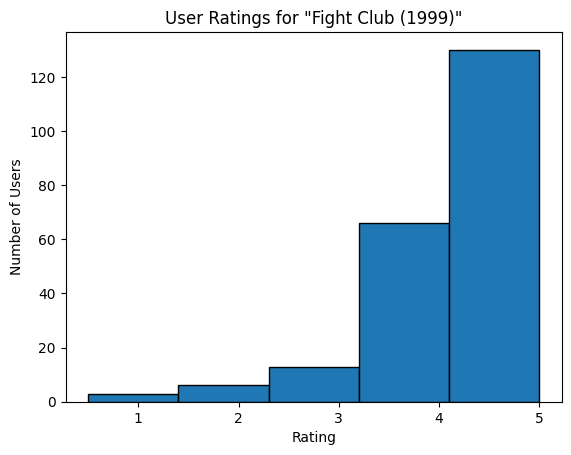

In [14]:
#the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df.loc[movies_df['title'] == 'Fight Club (1999)', 'movieId'].iloc[0]

# Filter ratings for "Fight Club (1999)"
fight_club_ratings = ratings_df.loc[ratings_df['movieId'] == fight_club_movie_id, 'rating']

# Plot histogram for user ratings
plt.hist(fight_club_ratings, bins=5, edgecolor='black')  # Adjust the number of bins as needed
plt.title('User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

**Which movie is the most popular based on  average user ratings?**


In [15]:
# Step 1: Group user ratings based on movieId and apply count and mean
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Step 2: Inner join with the movies dataset
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

filtered_df.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [16]:
# Assuming you have the filtered_df from the mandatory operations
# filtered_df = merged_df[merged_df['rating_count'] > 50]

# Find the movie with the highest average user rating
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]

# Display the result
print("Most popular movie based on average user ratings:")
print("Movie Title:", most_popular_movie['title'])
print("Average User Rating:", most_popular_movie['rating_mean'])

Most popular movie based on average user ratings:
Movie Title: Shawshank Redemption, The (1994)
Average User Rating: 4.429022082018927


**Select all the correct options which comes under top 5 popular movies based on number of user ratings.**


In [17]:
# Select the top 5 popular movies based on the number of user ratings
top_5_popular_movies = filtered_df.nlargest(5, 'rating_count')

# Display the result
print("Top 5 popular movies based on the number of user ratings:")
print(top_5_popular_movies[['title', 'rating_count']])

Top 5 popular movies based on the number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


**Which Sci-Fi movie is "third most popular" based on the number of user ratings?**

In [18]:
# Filter Sci-Fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Find the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi_movie = sci_fi_movies.nlargest(3, 'rating_count').iloc[-1]

# Display the result
print("Third most popular Sci-Fi movie based on the number of user ratings-")
print("Movie Title:", third_most_popular_sci_fi_movie['title'])
print("Number of User Ratings:", third_most_popular_sci_fi_movie['rating_count'])

Third most popular Sci-Fi movie based on the number of user ratings-
Movie Title: Jurassic Park (1993)
Number of User Ratings: 238


**Mention the movieId of the movie which has the highest IMDB rating.**


In [19]:
# Assuming this dataset has columns like 'movieId' and 'imdb_rating'
# Find the movie with the highest IMDb rating
highest_rated_movie = ratings_df.loc[ratings_df['rating'].idxmax()]

# Display the result
print("Movie with the highest IMDb rating:")
print("MovieId:", highest_rated_movie['movieId'])
print("IMDb Rating:", highest_rated_movie['rating'])

Movie with the highest IMDb rating:
MovieId: 47.0
IMDb Rating: 5.0


**Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.**

In [20]:
# Assuming this dataset has columns like 'movieId', 'imdb_rating', and 'genres'
# Filter Sci-Fi movies
#sci_fi_movies = merged_df[merged_df['genres']=='Sci-Fi']

sci_fi_movies = merged_df[merged_df['genres'] == 'Sci-Fi']['movieId'].iloc[0]
print(sci_fi_movies)

2311
